In [1]:
"""
to generate confusion matrix
"""

import sys
sys.path.insert(0, '..')

import pandas as pd
import pathlib
import numpy as np
from src.utils.utils import get_filenames_of_path

res_dir = pathlib.Path('../res/')
res_files = get_filenames_of_path(res_dir)
# print(res_files)

dfs = {}
for file in res_files:
    dfs[file.stem] = pd.read_csv(file)
# print(dfs)


In [2]:
## round

stats = {}
for name, df in dfs.items():
    
    stat = {}
    stat.update({'SASSAD': df['SASSAD'], 'TISS': df['TISS'], 'EASI': df['EASI']})
    stat.update({'SASSAD_pred': df['SASSAD_pred'].round(0), 'TISS_pred': df['TISS_pred'].round(0), 'EASI_pred': df['EASI_pred'].round(0)})
#     stat.update({'cra_rmse_m': mean['cra_rmse'], 'dry_rmse_m': mean['dry_rmse'], 'ery_rmse_m': mean['ery_rmse'], 'exc_rmse_m': mean['exc_rmse'], 'exu_rmse_m': mean['exu_rmse'], 'lic_rmse_m': mean['lic_rmse'], 'oed_rmse_m': mean['oed_rmse']})
#     stat.update({'cra_rmse_se': se['cra_rmse'], 'dry_rmse_se': se['dry_rmse'], 'ery_rmse_se': se['ery_rmse'], 'exc_rmse_se': se['exc_rmse'], 'exu_rmse_se': se['exu_rmse'], 'lic_rmse_se': se['lic_rmse'], 'oed_rmse_se': se['oed_rmse']})
#     stat.update({'cra_mae_m': mean['cra_ae'], 'dry_mae_m': mean['dry_ae'], 'ery_mae_m': mean['ery_ae'], 'exc_mae_m': mean['exc_ae'], 'exu_mae_m': mean['exu_ae'], 'lic_mae_m': mean['lic_ae'], 'oed_mae_m': mean['oed_ae']})
#     stat.update({'cra_mae_se': se['cra_ae'], 'dry_mae_se': se['dry_ae'], 'ery_mae_se': se['ery_ae'], 'exc_mae_se': se['exc_ae'], 'exu_mae_se': se['exu_ae'], 'lic_mae_se': se['lic_ae'], 'oed_mae_se': se['oed_ae']})
#     print(stat)

    stats[name] = stat
    
# # print(stats)
# stats_df = pd.DataFrame.from_dict(stats, orient='index')
# # print(stats_df)
# stats_df.to_csv('stats.csv')


In [3]:
## choose models and inputs

models = [
    'ASCORAD (Pred.)',
    'EczemaNet (Pred.)',
#     'EfficientNet',
#     '-Dropout',
#     '2FC',
    '2FC (-Dropout)',
    '1FC',
#     'SPP',
]

# inputs = [
#     'SWET (nBG-Crop-Skin)',
#     'SWET (nBG-Crop-AD)',
#     'SWET (nBG-Whole-Skin)', 
#     'SWET (wBG-Whole)',
#     ]

inputs = [
#     'SWET (nBG-Crop-Skin)',
#     'SWET (nBG-Crop-AD)',
    'SWET (nBG-Whole-Skin)', 
#     'SWET (wBG-Whole)',
#     'TLA (nBG-Crop-Skin)',
    'TLA (nBG-Whole-Skin)', 
#     'TLA (wBG-Whole)',
    ]

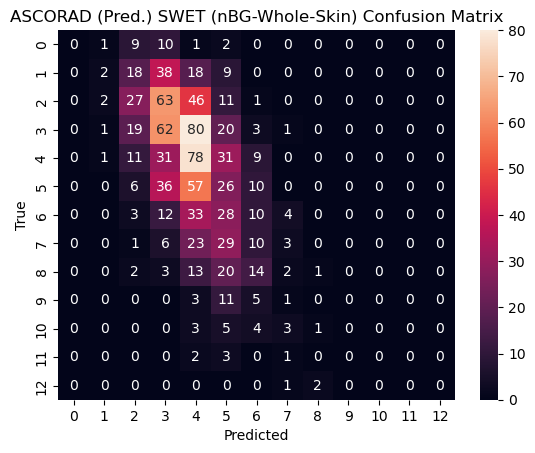

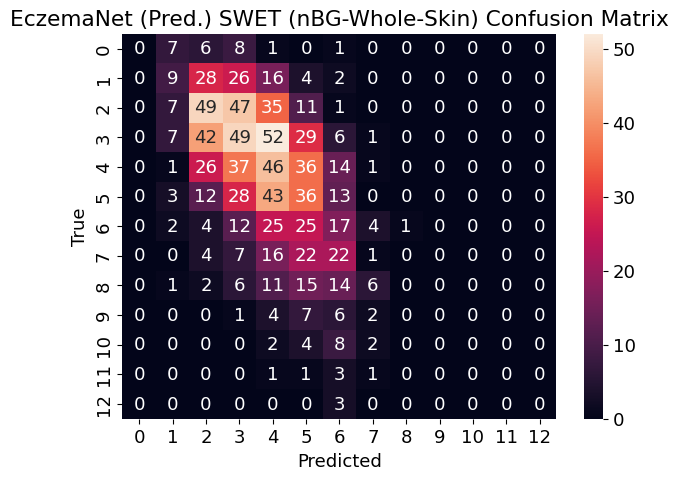

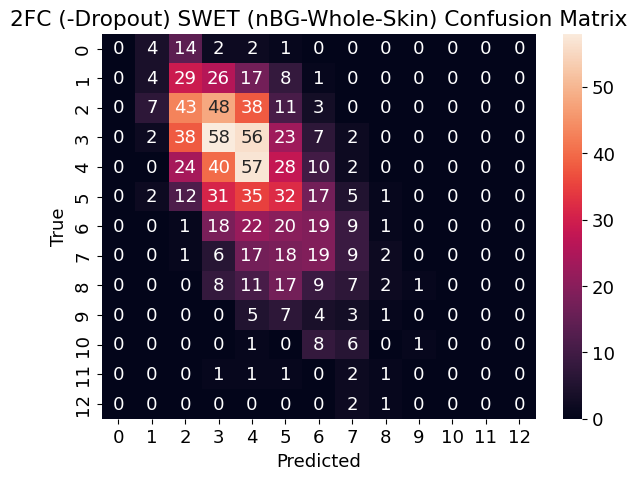

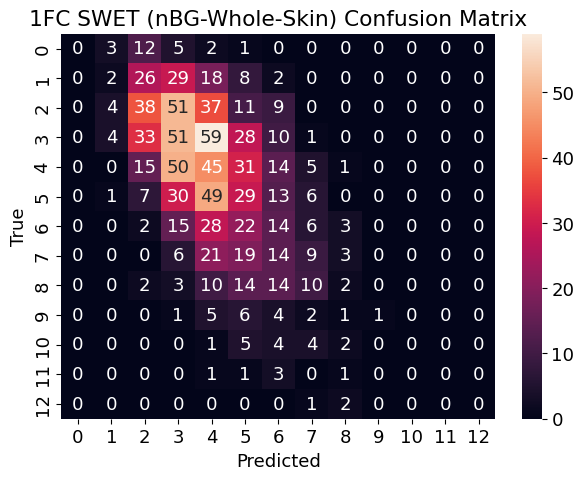

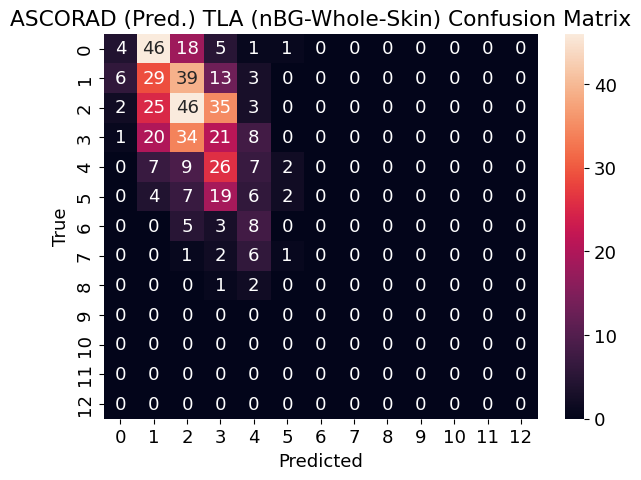

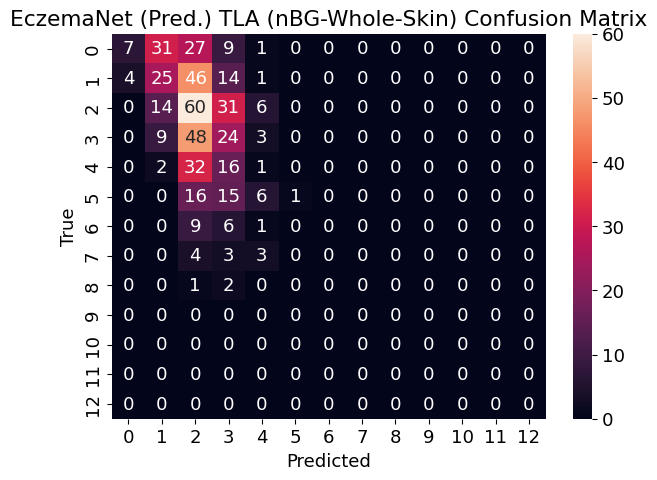

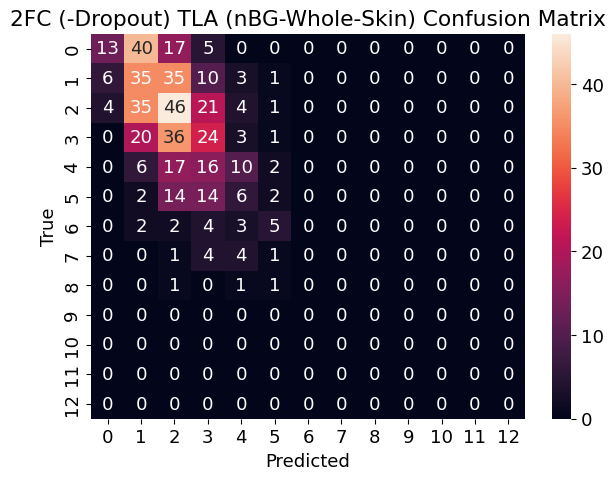

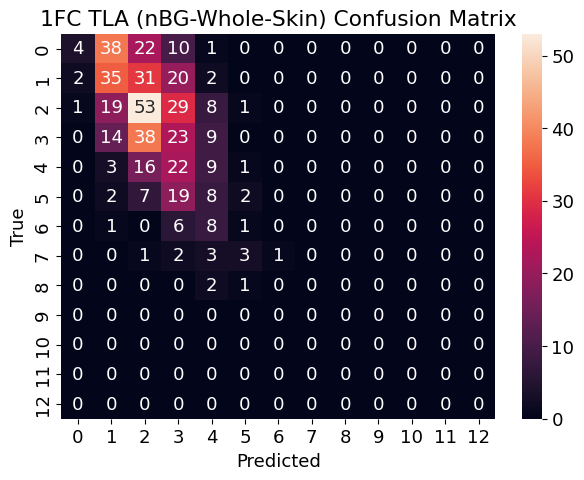

In [4]:
## plot

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn

for i_in in range(len(inputs)):
    for m in models:
        name = m + ' ' + inputs[i_in] + ' 0'
        try:
            attempt = stats[name]
        except:
            name = m + ' ' + inputs[i_in]
#           name = m + ' ' + inputs[i_in]
        y_true = stats[name]['EASI']
        y_pred = stats[name]['EASI_pred']
        
        labels = range(13)
        cm = confusion_matrix(y_true, y_pred, labels=labels)
        
        sn.heatmap(cm, annot=True)
        plt.title(name+' Confusion Matrix')
        plt.ylabel('True')
        plt.xlabel('Predicted')


        plt.rcParams.update({'font.size': 13})
        plt.rcParams["figure.figsize"] = (7,5)
#         plt.tight_layout()

        plt.show()
        # plt.savefig('IoU.png', bbox_inches='tight')